In [12]:
# display, transform, read, split ...
import numpy as np
import cv2 as cv
import os
import splitfolders
import matplotlib.pyplot as plt

# tensorflow
import tensorflow.keras as keras
import tensorflow as tf

# image processing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

# model / neural network
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

In [13]:
# # split data in a new folder named data-split
# path = r"C:\Users\bosen\Documents\CV_LEGO\10"
# splitfolders.ratio(path, output="data-10", seed=1337, ratio=(0.7, 0.2, 0.1), group_prefix=None, move=False)

In [14]:
datagen_default = ImageDataGenerator()

In [28]:
datagen = ImageDataGenerator(
    rotation_range=20,         # randomly rotate images in the range (degrees)
    width_shift_range=0.2,     # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,    # randomly shift images vertically (fraction of total height)
    shear_range=0.2,           # shear intensity (shear angle in radians)
    fill_mode='nearest'        # strategy used for filling in newly created pixels after rotation or shifting
)

In [29]:
# define classes name
class_names = [r'2357',r'2412b',r'2420',r'2429',r'2430',r'2431',r'2432',r'2436',r'2445',r'2450']

In [30]:
# training data
train_generator = datagen.flow_from_directory( 
    directory=r"C:\Users\bosen\Documents\CV_LEGO\data-10\train", 
    classes = class_names,
    target_size=(64, 64),  
    batch_size=64, 
    class_mode="binary", 
)

Found 28000 images belonging to 10 classes.


In [31]:
# validation data
valid_generator = datagen_default.flow_from_directory( 
    directory=r"C:\Users\bosen\Documents\CV_LEGO\data-10\val", 
    classes = class_names,
    target_size=(64, 64), 
    batch_size=64, 
    class_mode="binary", 
)

Found 8000 images belonging to 10 classes.


In [32]:
# test data
test_generator = datagen_default.flow_from_directory( 
    directory=r"C:\Users\bosen\Documents\CV_LEGO\data-10\test", 
    classes = class_names,
    target_size=(64, 64), 
    batch_size=64, 
    class_mode="binary", 
)

Found 4000 images belonging to 10 classes.


In [33]:
# ResNet50 model
resnet_50 = ResNet50(include_top=False, weights='imagenet', input_shape=(64,64,3))
for layer in resnet_50.layers:
    layer.trainable = False

In [34]:
# build the entire model
x = resnet_50.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(10, activation='softmax')(x)
model = Model(inputs = resnet_50.input, outputs = predictions)

In [35]:
# define training function
def trainModel(model, epochs, optimizer):
    batch_size = 64
    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model.fit(train_generator, validation_data=valid_generator, epochs=epochs, batch_size=batch_size)

In [36]:
# launch the training
model_history = trainModel(model = model, epochs = 10, optimizer = "Adam")

Epoch 1/10
438/438 [==============================] - 236s 524ms/step - loss: 2.2017 - accuracy: 0.2258 - val_loss: 1.4217 - val_accuracy: 0.5141
Epoch 2/10
438/438 [==============================] - 167s 381ms/step - loss: 1.5400 - accuracy: 0.4290 - val_loss: 1.1694 - val_accuracy: 0.5763
Epoch 3/10
438/438 [==============================] - 168s 382ms/step - loss: 1.3846 - accuracy: 0.4816 - val_loss: 1.0678 - val_accuracy: 0.5864
Epoch 4/10
438/438 [==============================] - 177s 403ms/step - loss: 1.2820 - accuracy: 0.5288 - val_loss: 1.0184 - val_accuracy: 0.6008
Epoch 5/10
438/438 [==============================] - 173s 394ms/step - loss: 1.2149 - accuracy: 0.5560 - val_loss: 0.9316 - val_accuracy: 0.6538
Epoch 6/10
438/438 [==============================] - 915s 2s/step - loss: 1.1652 - accuracy: 0.5753 - val_loss: 0.9093 - val_accuracy: 0.6675
Epoch 7/10
438/438 [==============================] - 243s 555ms/step - loss: 1.1142 - accuracy: 0.5928 - val_loss: 0.8763 - va

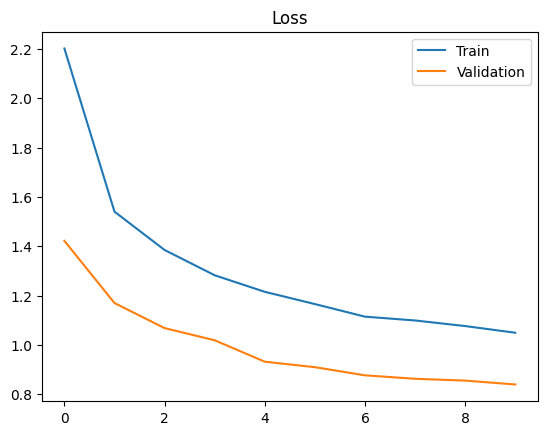

In [37]:
loss_train_curve = model_history.history["loss"]
loss_val_curve = model_history.history["val_loss"]
plt.plot(loss_train_curve, label = "Train")
plt.plot(loss_val_curve, label = "Validation")
plt.legend(loc = 'upper right')
plt.title("Loss")
plt.show()

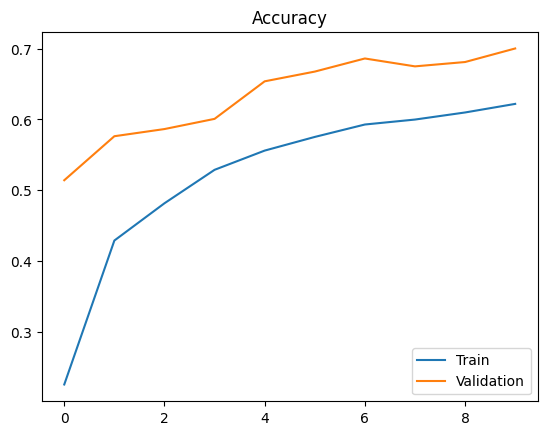

In [38]:
acc_train_curve = model_history.history["accuracy"]
acc_val_curve = model_history.history["val_accuracy"]
plt.plot(acc_train_curve, label = "Train")
plt.plot(acc_val_curve, label = "Validation")
plt.legend(loc = 'lower right')
plt.title("Accuracy")
plt.show()

In [41]:
test_loss, test_acc = model.evaluate(test_generator)
print("The test loss is: ", test_loss)
print("The best accuracy is: ", test_acc*100)

63/63 [==============================] - 29s 440ms/step - loss: 0.8266 - accuracy: 0.7135
The test loss is:  0.826629638671875
The best accuracy is:  71.35000228881836


In [40]:
model.save(r"C:\Users\bosen\Documents\CV_LEGO\models\resnet_default_preprocessing")

INFO:tensorflow:Assets written to: C:\Users\bosen\Documents\CV_LEGO\models\resnet_default_preprocessing\assets


INFO:tensorflow:Assets written to: C:\Users\bosen\Documents\CV_LEGO\models\resnet_default_preprocessing\assets


250/250 [==============================] - 151s 603ms/step - loss: 0.7570 - accuracy: 0.7278
The test loss is:  0.7569540739059488
The best accuracy is:  72.775000333786

63/63 [==============================] - 27s 427ms/step - loss: 0.8022 - accuracy: 0.7168
The test loss is:  0.8021820783615112
The best accuracy is:  71.6750025749206501